In [1]:
'''
GOALS:
Create a script in Python which calculates netto income and number of lessons for each week.
Show these results in a chart
Number of students in a dataset can vary each time - script should act accordingly
'''

'\nGOALS:\nCreate a script in Python which calculates netto income and number of lessons for each week.\nShow these results in a chart\nNumber of students in a dataset can vary each time - script should act accordingly\n'

In [2]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#pip install forex-python
from forex_python.converter import CurrencyRates
from datetime import datetime

In [3]:
#enable to see all columns in a notebook
pd.set_option('display.max_columns', None)

#enable to see all rows in a notebook
pd.set_option('display.max_rows', None)

In [4]:
#read data into dataframe
df = pd.read_excel('data.xlsx', header=None)

In [5]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,Name:,Susan,NaN,NaN,NaN,NaN,NaN,Name:,Mike,NaN,NaN,NaN,NaN,NaN,Name:,Karen,NaN,NaN,NaN,NaN,NaN,Name:,Amanda,NaN,NaN,NaN,NaN,NaN,Name:,Richard,NaN,NaN,NaN,NaN,NaN,Name:,Luke,NaN,NaN,NaN,NaN
1,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],NaN,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],NaN,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],NaN,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],NaN,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],NaN,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD]
2,1,2020-01-06 00:00:00,Talking,13.5,0,13.5,NaN,1,2022-01-28 00:00:00,Trial-classic (questions),11.25,0,11.25,NaN,1,2022-03-30 00:00:00,Present Simple,17,0,17,NaN,1,2022-06-27 00:00:00,I and you-beginner,20,0,20,NaN,1,2022-02-17 00:00:00,Trial,13,15,11.05,NaN,1,2022-02-14 00:00:00,Trial,17,100,0
3,2,2020-01-13 00:00:00,"Email-conference, News-Royals, Iran shot down ...",13.5,0,13.5,NaN,2,2022-02-07 00:00:00,Profese,11.25,28,8.1,NaN,2,2022-04-06 00:00:00,Present Continuous,17,0,17,NaN,2,2022-06-29 00:00:00,to be (affirmative)-elementary,20,0,20,NaN,2,2022-02-21 00:00:00,Dovolená,15,15,12.75,NaN,2,2022-02-21 00:00:00,Dovolená,17,25,12.75
4,3,2020-01-17 00:00:00,Future - tenses-1,13.5,0,13.5,NaN,3,2022-02-10 00:00:00,Genitiv z/ze,11.25,28,8.1,NaN,3,2022-04-13 00:00:00,Past Continuous,17,0,17,NaN,3,2022-07-04 00:00:00,to be (questions)-elementary,20,0,20,NaN,3,2022-02-28 00:00:00,Válka,15,15,12.75,NaN,3,2022-02-28 00:00:00,Válka,17,25,12.75


In [6]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
44,12,2022-05-30 00:00:00,"Talking-curse x course, New Zealand x Costa Rica",9.4,0,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,13,2022-05-31 00:00:00,"Talking-landslides, altitude in La Paz",9.4,0,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(49, 41)

In [8]:
#select first row of the dataset and convert it into a list
name_list=df.iloc[0].values.tolist()

#filter 'Name:' and 'NaN'
name_list = [x for x in name_list if not(pd.isnull(x)) == True if not x=='Name:']
print(name_list)

['Susan', 'Mike', 'Karen', 'Amanda', 'Richard', 'Luke']


In [9]:
#drop the first row with the names
df = df.iloc[1:] #take the data less than first row star-trow:end-row, start-col, end-col

#drop empty columns in dataframe
df.dropna(how='all', axis=1, inplace=True)

df.head(3)

,0,1,2,3,4,5,7,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,28,29,30,31,32,33,35,36,37,38,39,40
1,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD]
2,1,2020-01-06 00:00:00,Talking,13.5,0,13.5,1,2022-01-28 00:00:00,Trial-classic (questions),11.25,0,11.25,1,2022-03-30 00:00:00,Present Simple,17,0,17,1,2022-06-27 00:00:00,I and you-beginner,20,0,20,1,2022-02-17 00:00:00,Trial,13,15,11.05,1,2022-02-14 00:00:00,Trial,17,100,0
3,2,2020-01-13 00:00:00,"Email-conference, News-Royals, Iran shot down ...",13.5,0,13.5,2,2022-02-07 00:00:00,Profese,11.25,28,8.1,2,2022-04-06 00:00:00,Present Continuous,17,0,17,2,2022-06-29 00:00:00,to be (affirmative)-elementary,20,0,20,2,2022-02-21 00:00:00,Dovolená,15,15,12.75,2,2022-02-21 00:00:00,Dovolená,17,25,12.75


In [10]:
#get number of columns
cols = len(df.axes[1])

#divide columns by number of names = cluster of culumns per student
index=cols/len(name_list)

#convert result into integer
index = int(index) 
index

6

In [11]:
#add column 'name'
for i in range(len(name_list)):
    df.insert(i*index+i, name_list[i], name_list[i])

In [12]:
#show change
df.head(3)

,Susan,0,1,2,3,4,5,Mike,7,8,9,10,11,12,Karen,14,15,16,17,18,19,Amanda,21,22,23,24,25,26,Richard,28,29,30,31,32,33,Luke,35,36,37,38,39,40
1,Susan,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],Mike,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],Karen,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],Amanda,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],Richard,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],Luke,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD]
2,Susan,1,2020-01-06 00:00:00,Talking,13.5,0,13.5,Mike,1,2022-01-28 00:00:00,Trial-classic (questions),11.25,0,11.25,Karen,1,2022-03-30 00:00:00,Present Simple,17,0,17,Amanda,1,2022-06-27 00:00:00,I and you-beginner,20,0,20,Richard,1,2022-02-17 00:00:00,Trial,13,15,11.05,Luke,1,2022-02-14 00:00:00,Trial,17,100,0
3,Susan,2,2020-01-13 00:00:00,"Email-conference, News-Royals, Iran shot down ...",13.5,0,13.5,Mike,2,2022-02-07 00:00:00,Profese,11.25,28,8.1,Karen,2,2022-04-06 00:00:00,Present Continuous,17,0,17,Amanda,2,2022-06-29 00:00:00,to be (affirmative)-elementary,20,0,20,Richard,2,2022-02-21 00:00:00,Dovolená,15,15,12.75,Luke,2,2022-02-21 00:00:00,Dovolená,17,25,12.75


In [13]:
#get number of columns
cols = len(df.axes[1])

#divide columns by number of names = cluster of culumns per student
index=cols/len(name_list)

#convert result into integer
index = int(index) 
index

7

In [14]:
#delete headers - due to concate
df.columns = [''] * len(df.columns)

In [15]:
#create new headers
#save the first row with the names of columns
new_header=df.iloc[0].values.tolist()

#strip the list
new_header=new_header[:index]

#replace first index for name
new_header[0]='Name'

new_header

['Name',
 'Class number',
 'Date',
 'Topic',
 'profit bruto [USD]',
 'comission [%]',
 'profit netto [USD]']

In [16]:
#Concating dataframes

#define dataFrame I will use for concating
df3 = pd.DataFrame()

#add columns 'name'
for i in range(len(name_list)):

    df2=df.iloc[:,(i*index):i*index+index]

    df3=pd.concat([df3, df2],ignore_index=True, sort=False)


In [17]:
#define new header
df3.columns = new_header

#check
df3.head(3)

,Name,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD]
0,Susan,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD]
1,Susan,1,2020-01-06 00:00:00,Talking,13.5,0,13.5
2,Susan,2,2020-01-13 00:00:00,"Email-conference, News-Royals, Iran shot down ...",13.5,0,13.5


In [18]:
#define function for a position of certain item
def find_indices(list_name, searched_value1, searched_value2):
    indices = [i for i, x in enumerate(list_name) if x == searched_value1 or x == searched_value2]
    return indices

In [19]:
# fill NaN by 'zero'
df3=df3.fillna('zero')

In [20]:
#take first column for finding indexes of element I will remove
nan_column=df3.iloc[:,2]

#search the items I want to remove - and get them in a list
position=find_indices(nan_column, 'zero','Date')

#remove duplicates passing the list with the NaN rows
df3=df3.drop(index=position)


In [21]:
#check if value is in dataframe- expected zero
if 'zero' or 'Date 'not in df3.values:
    print("Everything's OK - not found the values I had deleted :-)" )
else:
    print("Error-values that should have been deleted were found!!!")

Everything's OK - not found the values I had deleted :-)


In [22]:
#check
df3.head(3)

,Name,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD]
1,Susan,1,2020-01-06 00:00:00,Talking,13.5,0,13.5
2,Susan,2,2020-01-13 00:00:00,"Email-conference, News-Royals, Iran shot down ...",13.5,0,13.5
3,Susan,3,2020-01-17 00:00:00,Future - tenses-1,13.5,0,13.5


In [23]:
#create day, week, year column and number of lessons

#number of lessons, set to value 1, will help to sum
df3['lesson'] = 1

#convert into datetime
df3[new_header[2]] = pd.to_datetime(df3[new_header[2]])

#weekday
df3['day'] = df3[new_header[2]].dt.dayofweek

#week
df3['week'] = df3[new_header[2]].dt.isocalendar().week

#month
df3['month'] = df3[new_header[2]].dt.month

#month
df3['year'] = df3[new_header[2]].dt.year

df3.head(3)

,Name,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],lesson,day,week,month,year
1,Susan,1,2020-01-06,Talking,13.5,0,13.5,1,0,2,1,2020
2,Susan,2,2020-01-13,"Email-conference, News-Royals, Iran shot down ...",13.5,0,13.5,1,0,3,1,2020
3,Susan,3,2020-01-17,Future - tenses-1,13.5,0,13.5,1,4,3,1,2020


In [24]:
#rename days
list=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df3['day_name']=df3['day'].replace(np.linspace(0,6,7), list)

df3.head(5)

,Name,Class number,Date,Topic,profit bruto [USD],comission [%],profit netto [USD],lesson,day,week,month,year,day_name
1,Susan,1,2020-01-06,Talking,13.5,0,13.5,1,0,2,1,2020,Monday
2,Susan,2,2020-01-13,"Email-conference, News-Royals, Iran shot down ...",13.5,0,13.5,1,0,3,1,2020,Monday
3,Susan,3,2020-01-17,Future - tenses-1,13.5,0,13.5,1,4,3,1,2020,Friday
4,Susan,4,2020-01-20,Future - tenses-2,13.5,0,13.5,1,0,4,1,2020,Monday
5,Susan,5,2020-01-24,"News-Nizman, Mexican migrants",13.5,0,13.5,1,4,4,1,2020,Friday


In [25]:
#####################
#Grouping and ploting charts
####################

In [26]:
#define function for grouping
def group_by(   df, number=2,
                col_group_by1='', 
                col_group_by2='', 
                col_sum1='', 
                col_sum2=''):
    if number ==2:
        df1 = df.groupby([col_group_by1,col_group_by2],as_index = False)[[col_sum1]].sum() #sum first value
        df2 = df.groupby([col_group_by1,col_group_by2],as_index = False)[[col_sum2]].sum() #sum second value
        df3=df1
        df3[col_sum2]=df2[col_sum2] #add one column to another column, concate did not work-I don't know why
        
    elif number==1:
        df1 = df.groupby([col_group_by1],as_index = False)[[col_sum1]].sum() #sum first value
        df2 = df.groupby([col_group_by1],as_index = False)[[col_sum2]].sum() #sum second value
        df3=df1
        df3[col_sum2]=df2[col_sum2]

    return df3

In [27]:
#group same weeks
#call the group_by function
df_week=group_by(   df3,number=2, 
                    col_group_by1='year',
                    col_group_by2='week',
                    col_sum1='profit netto [USD]',
                    col_sum2='lesson')
df_week.head(5)

,year,week,profit netto [USD],lesson
0,2020,2,13.5,1
1,2020,3,27.0,2
2,2020,4,27.0,2
3,2020,5,40.5,3
4,2020,6,13.5,1


In [28]:
#define function for ploting 2 charts

def plot_two_charts(df, x_stick_frequency=1,
                    y_column1='y_name1',y_column2='y_name1',
                    xlabel='label x', 
                    ylabel1='label y1', ylabel2='label y2',
                    date_col1='col1', date_col2='col2',
                    title1='title1', title2='title2'
                    ):   

    #define number of points for X and Y axis
    x= np.arange(0,df.shape[0],1) #start, end, step, possible to use np.linspace(start, end, number of points)
    y1=df[y_column1]
    y2=df[y_column2]

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    #plot data
    axes[0].plot(x, y1,marker='x',color='red')
    axes[1].plot(x, y2,marker='+',color='blue')


    #name of X and Y labels
    axes[0].set_xlabel(xlabel,fontsize=14)
    axes[1].set_xlabel(xlabel,fontsize=14)

    axes[0].set_ylabel(ylabel1, fontsize=14)
    axes[1].set_ylabel(ylabel2, fontsize=14)

    #name of X sticks
    axes[0].set_xticks(x, zip(df[date_col1], df[date_col2]),rotation=45,fontsize=8)
    axes[1].set_xticks(x, zip(df[date_col1], df[date_col2]),rotation=45,fontsize=8)

    #frequency
    axes[0].set_xticks(np.arange(0, len(x)+1, x_stick_frequency))
    axes[1].set_xticks(np.arange(0, len(x)+1, x_stick_frequency))

    #title
    axes[0].set_title(title1, fontsize=16)
    axes[1].set_title(title2, fontsize=16)

    plt.show()

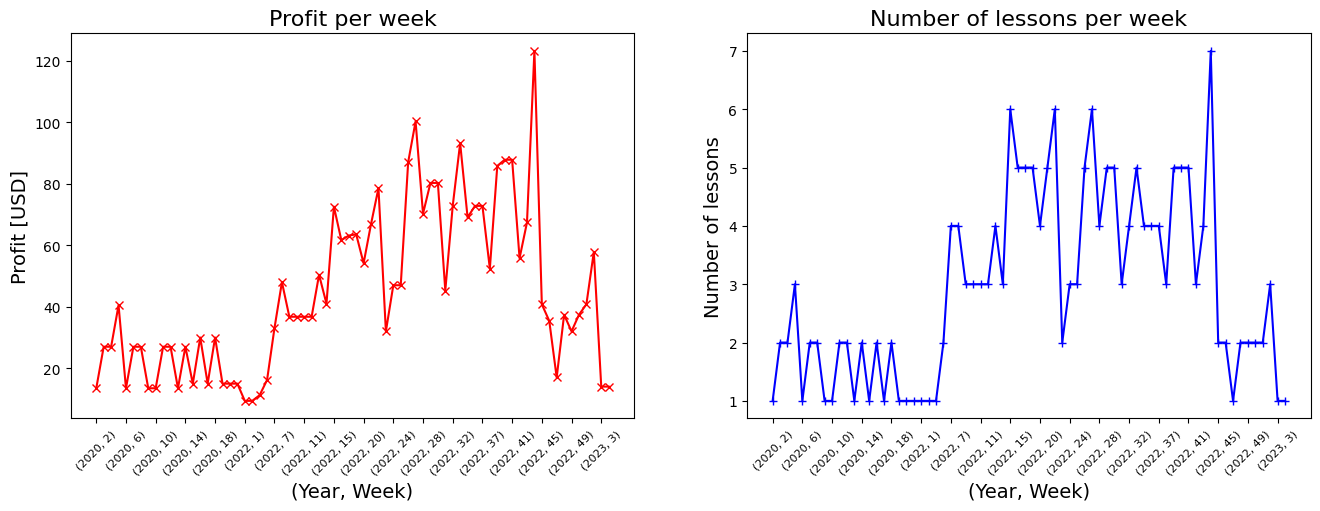

In [29]:
#plot charts using a function
plot_two_charts(    df_week, x_stick_frequency=4,
                    y_column1='profit netto [USD]',y_column2='lesson',
                    xlabel='(Year, Week)', 
                    ylabel1='Profit [USD]', ylabel2='Number of lessons',
                    date_col1='year', date_col2='week',
                    title1='Profit per week', title2='Number of lessons per week'
                    )

In [30]:
#group same months
#call the group_by function
df_month=group_by(      df3, number=2,
                        col_group_by1='year', 
                        col_group_by2='month', 
                        col_sum1='profit netto [USD]', 
                        col_sum2='lesson')
df_month.head(5)

,year,month,profit netto [USD],lesson
0,2020,1,108.0,8
1,2020,2,81.0,6
2,2020,3,94.5,7
3,2020,4,103.5,7
4,2020,5,45.0,3


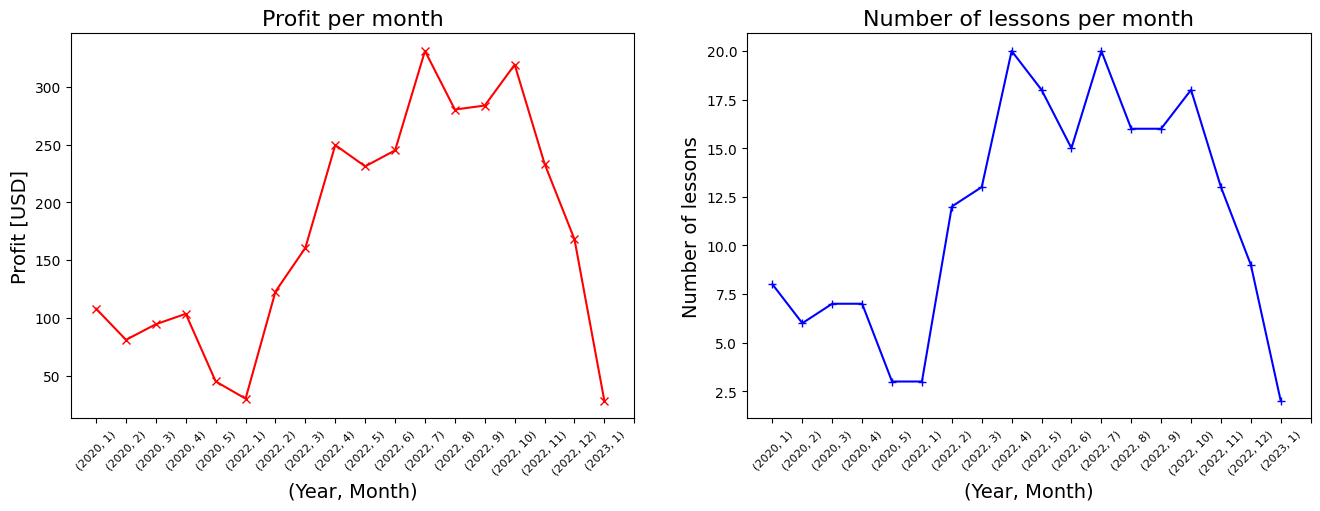

In [31]:
#plot charts using a function
plot_two_charts(    df_month, x_stick_frequency=1,
                    y_column1='profit netto [USD]',y_column2='lesson',
                    xlabel='(Year, Month)', 
                    ylabel1='Profit [USD]', ylabel2='Number of lessons',
                    date_col1='year', date_col2='month',
                    title1='Profit per month', title2='Number of lessons per month'
                    )

In [32]:
#group same years
#call the group_by function
df_year=group_by(       df3, number=1,
                        col_group_by1='year', 
                        col_group_by2='year', 
                        col_sum1='profit netto [USD]', 
                        col_sum2='lesson')
df_year.head(5)

,year,profit netto [USD],lesson
0,2020,432.00,31
1,2022,2655.01,173
2,2023,28.08,2


In [33]:
#define function for ploting 2 bar charts

def plot_bar_charts(df, x_stick_frequency=1,
                    y_column1='y_name1',y_column2='y_name1',
                    xlabel='label x', 
                    ylabel1='label y1', ylabel2='label y2',
                    xstick_col='xstick',
                    title1='title1', title2='title2'
                    ):   

    #define number of points for X and Y axis
    x= np.arange(0,df.shape[0],1) #start, end, step, possible to use np.linspace(start, end, number of points)
    y1=df[y_column1]
    y2=df[y_column2]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    #plot data
    axes[0].bar(x, y1, width=0.8, color='indianred')
    axes[1].bar(x, y2, width=0.8, color='royalblue')

    #name of X and Y labels
    axes[0].set_xlabel(xlabel,fontsize=14)
    axes[1].set_xlabel(xlabel,fontsize=14)

    axes[0].set_ylabel(ylabel1, fontsize=14)
    axes[1].set_ylabel(ylabel2, fontsize=14)

    #name of X sticks
    axes[0].set_xticks(x, df[xstick_col],rotation=45,fontsize=8)
    axes[1].set_xticks(x, df[xstick_col],rotation=45,fontsize=8)

    #frequency
    axes[0].set_xticks(np.arange(0, len(x)+1, x_stick_frequency))
    axes[1].set_xticks(np.arange(0, len(x)+1, x_stick_frequency))

    #title
    axes[0].set_title(title1, fontsize=16)
    axes[1].set_title(title2, fontsize=16)


    plt.show()

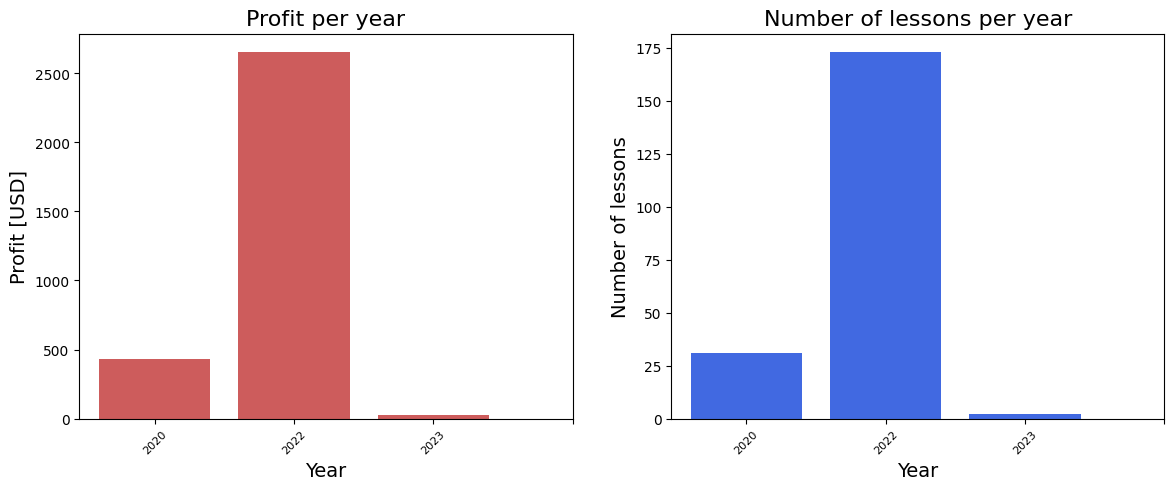

In [34]:
#plot charts using a function
plot_bar_charts(    df_year, x_stick_frequency=1,
                    y_column1='profit netto [USD]',y_column2='lesson',
                    xlabel='Year', 
                    ylabel1='Profit [USD]', ylabel2='Number of lessons',
                    xstick_col='year',
                    title1='Profit per year', title2='Number of lessons per year'
                    )

In [35]:
#group same weekday
#call the group_by function
df_weekday=group_by(    df3, number=2,
                        col_group_by1='day', 
                        col_group_by2='day_name', 
                        col_sum1='profit netto [USD]', 
                        col_sum2='lesson')
df_weekday.head(7)

,day,day_name,profit netto [USD],lesson
0,0,Monday,985.84,66
1,1,Tuesday,346.26,25
2,2,Wednesday,687.09,43
3,3,Thursday,543.80,34
4,4,Friday,476.30,32
5,5,Saturday,47.30,4
6,6,Sunday,28.50,2


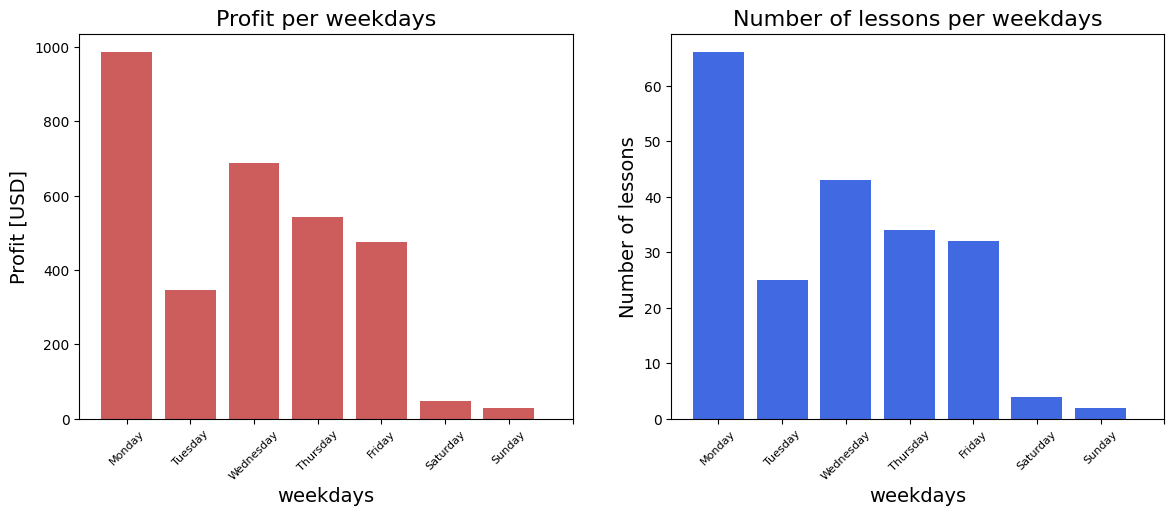

In [36]:
#plot bar charts using a function
plot_bar_charts(    df_weekday, x_stick_frequency=1,
                    y_column1='profit netto [USD]',y_column2='lesson',
                    xlabel='weekdays', 
                    ylabel1='Profit [USD]', ylabel2='Number of lessons',
                    xstick_col='day_name',
                    title1='Profit per weekdays', title2='Number of lessons per weekdays'
                    )